# Wine Quality Prediction ML

I will build a Wine Quality Prediction model using several algorithms. The best quality is 10 and the worst is 1.

In [85]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [86]:
#Read input data
df = pd.read_csv("winequality-red.csv")

In [87]:
#Describe the data
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [88]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [89]:
#Types of data
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [90]:
#Check the data

df.isnull()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [91]:
#checking the class distribution of target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

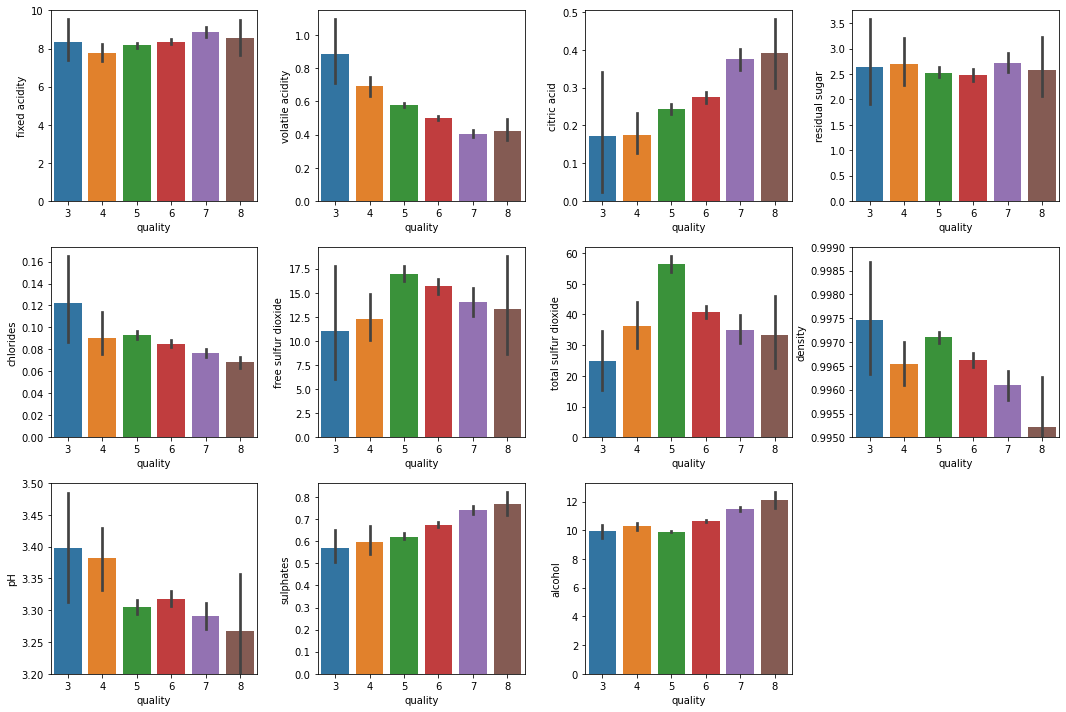

In [92]:
#Plotting out the data
import pylab

fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)
plt.ylim(0.995, 0.999)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)
plt.ylim(3.2, 3.5)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)
plt.tight_layout()

From the plots below we can infer:

·Quality is high when volatile acidity is less.

·Quality is high when citric acid is high.

·Quality is high when chlorides are less.

·Quality is high when sulphates are more.

·Quality is high when density are less.

·Quality is high when alcohol is more.

In [93]:
#Check the correlation

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


This correlation show us the same data as the plots, afirm our statements.

In [94]:
#from 2 to 6.5 it is considered bad and above that it is good as 8 is the max value of quality
ranges = (2,6.5,8) 
groups = ['Bad','Good']
df['quality'] = pd.cut(df['quality'], bins=ranges,labels=groups)

Here we are cutting bins use pd.cut() in 2 categories 2-6.5 as BAD and 6.5-8 as GOOD.

In [95]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad


In [96]:
df['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

In [97]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [98]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Balancing the two classes.

In [99]:
good_quality = df[df['quality']==1]
bad_quality = df[df['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:len(good_quality)]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,1
1508,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,0
669,11.3,0.34,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,0
1584,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,1
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,10.0,0.43,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,0
625,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,0
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,1
1290,7.6,0.74,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0,0


In [100]:
new_df['quality'].value_counts()

1    217
0    217
Name: quality, dtype: int64

In this step, we are simply balancing our dataset.
We are making a new data frame good_quality in which we will have data of just good_quality wine or we can say where the quality is 1.
Similarly, we are making for bad_quality.
Then we are simply shuffling bad quality data using df.sample(frac=1). It means shuffle the data and take a 100% fraction of the data.
Then we are taking out 217 samples of bad_quality because we have just 217 samples of good_quality.
Then we are joining both 217 samples of each class and our final data frame will have 217*2=434 rows.

In [101]:
#Checking correlation again between columns.

new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.546336
sulphates               0.327797
citric acid             0.313706
fixed acidity           0.125380
residual sugar          0.005748
free sulfur dioxide    -0.062200
pH                     -0.078971
total sulfur dioxide   -0.155759
chlorides              -0.164185
density                -0.254212
volatile acidity       -0.433379
Name: quality, dtype: float64

# PREDICTIVE MODEL

In [102]:
#Splitting the data in train and test.
from sklearn.model_selection import train_test_split

X = new_df.iloc[:,[0,1,2,4,7,9,10]].values
Y = new_df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


### Random Forest 

Finally training our Wine Quality Prediction model.

In [103]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, Y_train)

print('Best parameters --> ', grid_rf.best_params_)

Y_pred = grid_rf.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))
print('\n')
print(accuracy_score(Y_test,Y_pred))

Best parameters -->  {'n_estimators': 1000}
[[51 13]
 [ 5 62]]


              precision    recall  f1-score   support

           0       0.91      0.80      0.85        64
           1       0.83      0.93      0.87        67

    accuracy                           0.86       131
   macro avg       0.87      0.86      0.86       131
weighted avg       0.87      0.86      0.86       131



0.8625954198473282


In [116]:
acc_random_forest = accuracy_score(Y_test,Y_pred)
acc_random_forest

0.8625954198473282

Here I have used GridSearchCV with Random Forest to find the best value of the ‘n_estimators’ parameter.

Finally, we ended up with an accuracy of 86% which is very good for this much small dataset.

### Decision tree

In [117]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred2 = model.predict(X_test)

Matriz de Confusión:


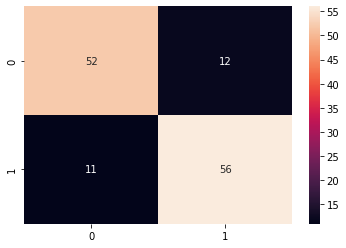

In [118]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

matriz = confusion_matrix(Y_test, Y_pred2)
print('Matriz de Confusión:')

sn.heatmap(matriz, annot=True)
plt.show()

In [119]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(Y_test,Y_pred2))
#precision score
print("precision:", metrics.precision_score(Y_test,Y_pred2))
#recall score
print("recall" , metrics.recall_score(Y_test,Y_pred2))
print(metrics.classification_report(Y_test, Y_pred2))

acuracy: 0.8244274809160306
precision: 0.8235294117647058
recall 0.835820895522388
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        64
           1       0.82      0.84      0.83        67

    accuracy                           0.82       131
   macro avg       0.82      0.82      0.82       131
weighted avg       0.82      0.82      0.82       131



Matriz de Confusión para Profundidad 1


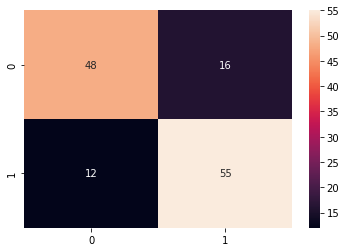

acuracy: 0.7862595419847328
precision: 0.7870336522954521
recall 0.7862595419847328
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        64
           1       0.77      0.82      0.80        67

    accuracy                           0.79       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.79      0.79      0.79       131

Matriz de Confusión para Profundidad 2


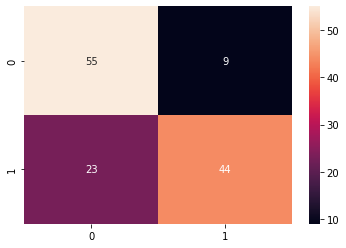

acuracy: 0.7557251908396947
precision: 0.7690904323483899
recall 0.7557251908396947
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        64
           1       0.83      0.66      0.73        67

    accuracy                           0.76       131
   macro avg       0.77      0.76      0.75       131
weighted avg       0.77      0.76      0.75       131

Matriz de Confusión para Profundidad 3


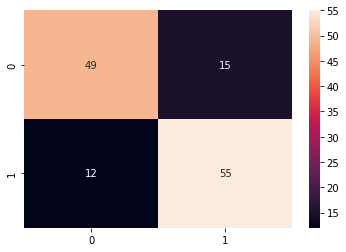

acuracy: 0.7938931297709924
precision: 0.7942953680032894
recall 0.7938931297709924
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        64
           1       0.79      0.82      0.80        67

    accuracy                           0.79       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.79      0.79      0.79       131

Matriz de Confusión para Profundidad 4


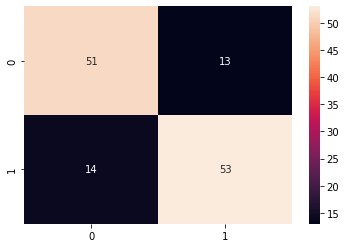

acuracy: 0.7938931297709924
precision: 0.7940337016672895
recall 0.7938931297709924
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        64
           1       0.80      0.79      0.80        67

    accuracy                           0.79       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.79      0.79      0.79       131

Matriz de Confusión para Profundidad 5


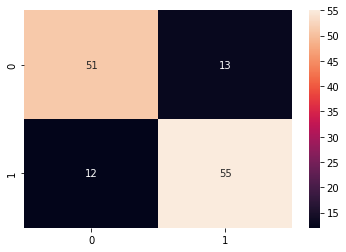

acuracy: 0.8091603053435115
precision: 0.8091656509932218
recall 0.8091603053435115
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        64
           1       0.81      0.82      0.81        67

    accuracy                           0.81       131
   macro avg       0.81      0.81      0.81       131
weighted avg       0.81      0.81      0.81       131

Matriz de Confusión para Profundidad 6


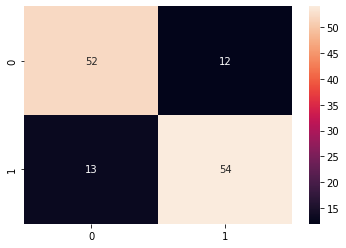

acuracy: 0.8091603053435115
precision: 0.8092990978487162
recall 0.8091603053435115
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        64
           1       0.82      0.81      0.81        67

    accuracy                           0.81       131
   macro avg       0.81      0.81      0.81       131
weighted avg       0.81      0.81      0.81       131

Matriz de Confusión para Profundidad 7


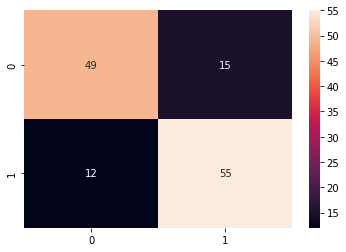

acuracy: 0.7938931297709924
precision: 0.7942953680032894
recall 0.7938931297709924
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        64
           1       0.79      0.82      0.80        67

    accuracy                           0.79       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.79      0.79      0.79       131

Matriz de Confusión para Profundidad 8


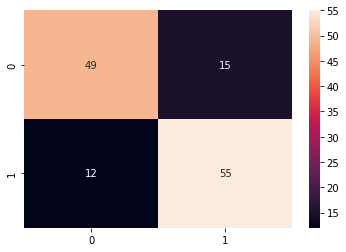

acuracy: 0.7938931297709924
precision: 0.7942953680032894
recall 0.7938931297709924
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        64
           1       0.79      0.82      0.80        67

    accuracy                           0.79       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.79      0.79      0.79       131



In [109]:
#Searching the best depth range

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Lista de valores con máxima profundidad:
max_depth_range = list(range(1, 9))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)    
    Y_pred2 = clf.predict(X_test)
    matriz = confusion_matrix(Y_test, Y_pred2)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
    print("acuracy:", accuracy_score(Y_test, Y_pred2))
    #precision score
    print("precision:", precision_score(Y_test, Y_pred2,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(Y_test,Y_pred2,average='weighted'))
    print(metrics.classification_report(Y_test, Y_pred2))

In [121]:
acc_decision_tree = accuracy_score(Y_test,Y_pred2)
acc_decision_tree

0.8244274809160306

##  Neural Networks

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
#Modelo RN
#Initializing the MLPClassifier "identity"
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,200,300), max_iter=300,activation = 'identity',solver='adam',random_state=1)

In [124]:
classifier.fit(X_train, Y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(100, 200, 300),
              max_iter=300, random_state=1)

In [125]:
Y_pred3 = classifier.predict(X_test)


In [126]:
# Confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, Y_pred3)
print(cm2)

[[52 12]
 [ 8 59]]


In [127]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(Y_test,Y_pred3))
#precision score
print("precision:", metrics.precision_score(Y_test,Y_pred3))
#recall score
print("recall" , metrics.recall_score(Y_test,Y_pred3))
print(metrics.classification_report(Y_test, Y_pred3))

acuracy: 0.8473282442748091
precision: 0.8309859154929577
recall 0.8805970149253731
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        64
           1       0.83      0.88      0.86        67

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.85      0.85      0.85       131



In [129]:
acc_redes = accuracy_score(Y_test,Y_pred3)
acc_redes

0.8473282442748091

In [130]:
#Comparison of all predictive models

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Redes Neuronales', 'Random Forest'],
    'Score': [ acc_decision_tree,acc_redes,acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.862595
1,Redes Neuronales,0.847328
0,Decision Tree,0.824427


## Summary

Finally, we ended up with an accuracy of 86% which Random Forest, is the best model for this dataset :)